In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

df = pd.read_csv('/kaggle/input/profit/50_Startups (1).csv')
dataset = pd.DataFrame(df)
warnings.filterwarnings('ignore')



In [2]:
dataset.tail()
dataset.head()

R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94

In [3]:
dataset.describe()

R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

<Axes: >

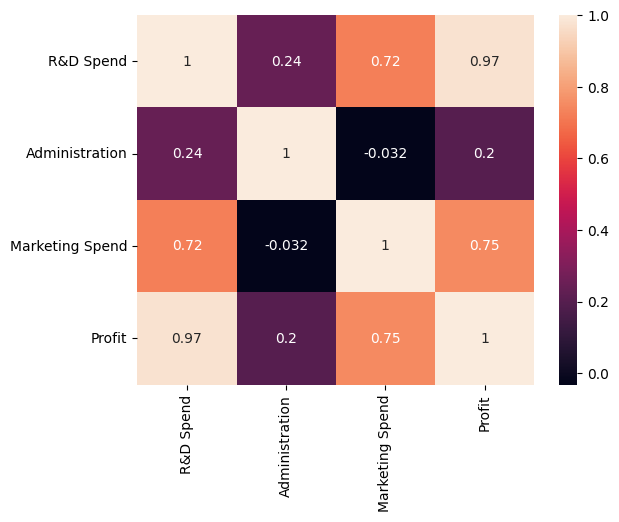

In [4]:
sns.heatmap(df.corr(),annot=True)

<Axes: ylabel='Count'>

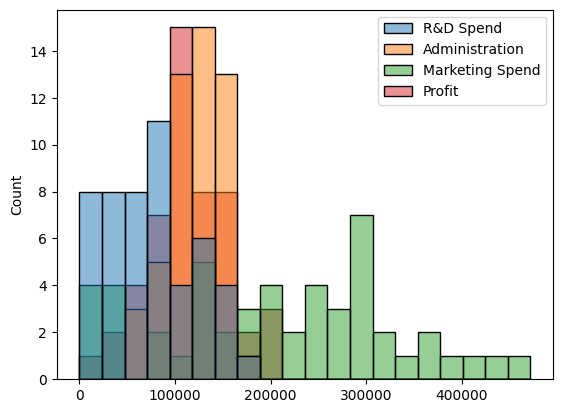

In [5]:
sns.histplot(data=dataset,bins=20)

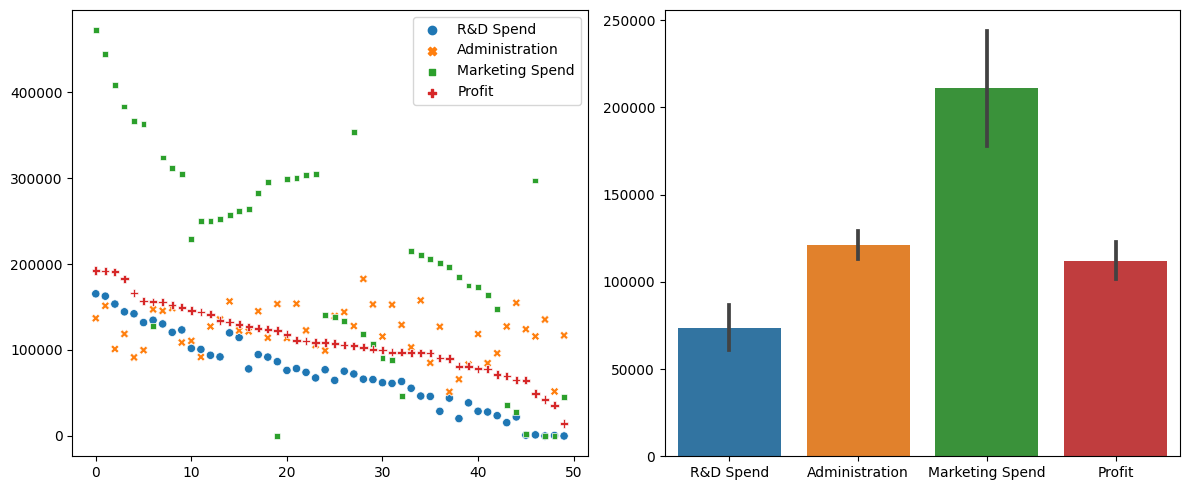

In [6]:
#scatter plot
f,axs = plt.subplots(1,2, figsize=(12,5))
sns.scatterplot(data=dataset,ax=axs[0])
sns.barplot(data=dataset,ax=axs[1])
f.tight_layout()

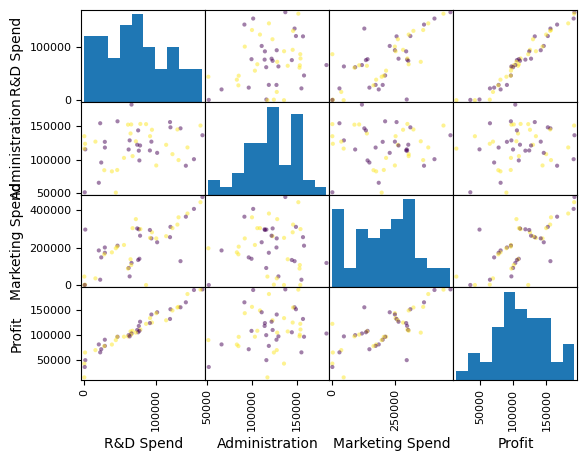

<Figure size 2400x2400 with 0 Axes>

In [7]:
pd.plotting.scatter_matrix(dataset,c=list(map(lambda x:x%2,[i for i in range(50)])))
plt.figure(figsize=(24,24))
plt.show()

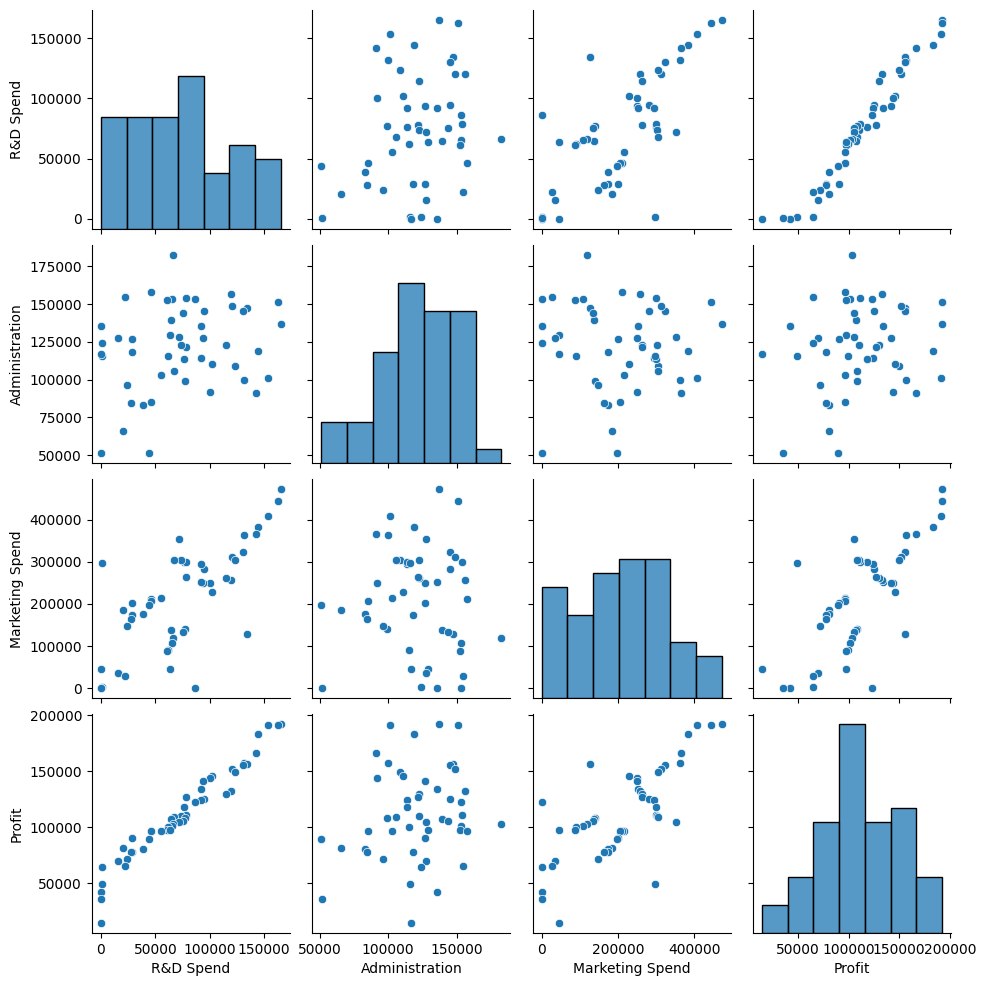

In [8]:
sns.pairplot(data=dataset)

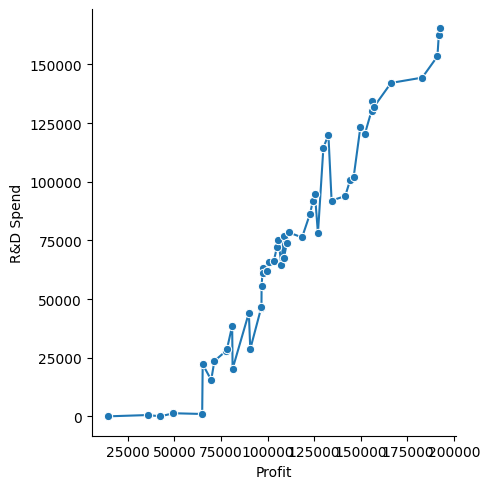

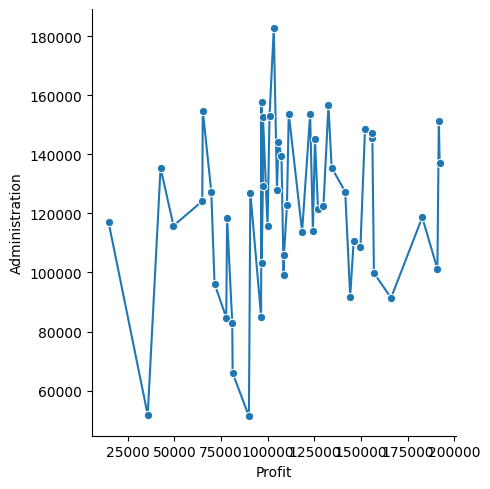

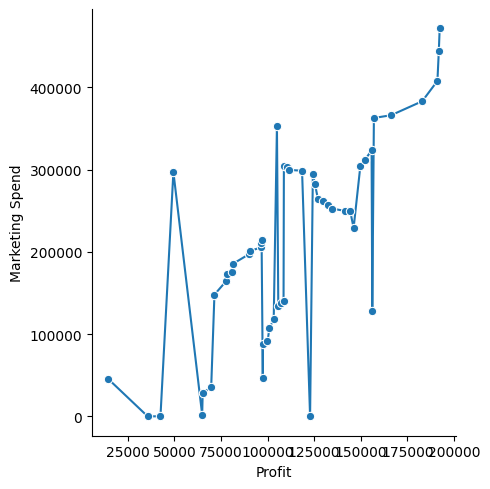

In [9]:

sns.relplot(data=dataset,x="Profit",y="R&D Spend",kind="line",marker='o')
sns.relplot(data=dataset,y="Administration",x="Profit",kind="line",marker="o")
sns.relplot(data=dataset,x="Profit",y="Marketing Spend",kind="line",marker="o")

f.tight_layout()

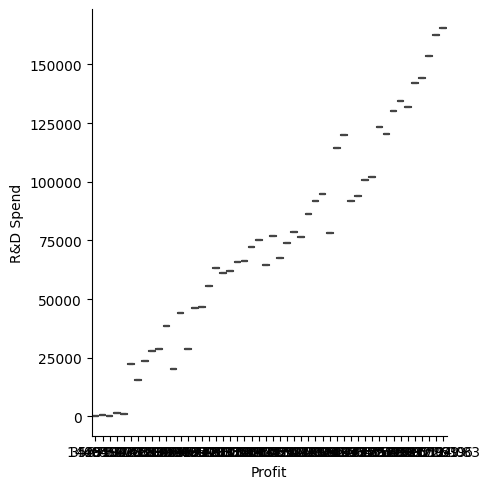

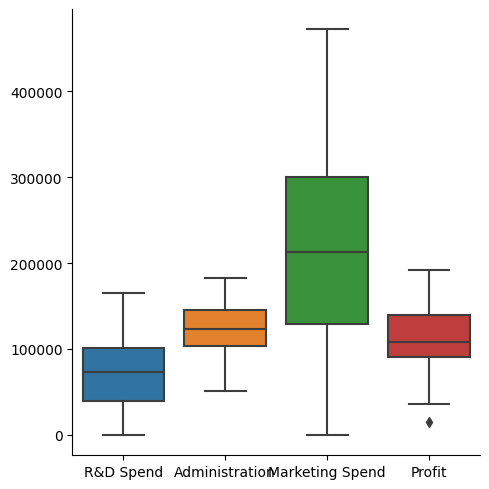

In [10]:
sns.catplot(data=dataset,x="Profit",y="R&D Spend",kind="box")
sns.catplot(data=dataset,kind="box")

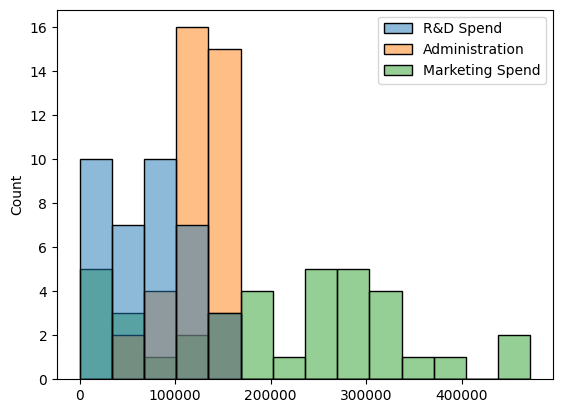

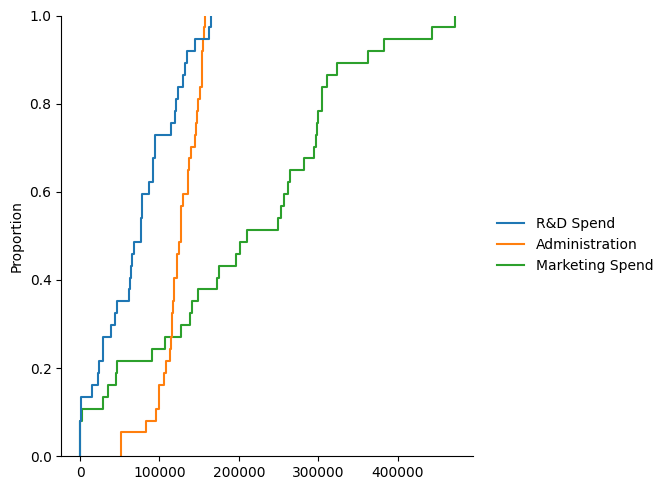

In [11]:
from sklearn.model_selection import train_test_split

df = pd.DataFrame(dataset.iloc[:,:4])

x = df.iloc[:,:3]
y = df.iloc[:,3]

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

#visualisation for Train dataset
sns.histplot(data=x_train)
sns.displot(data=x_train,kind="ecdf")

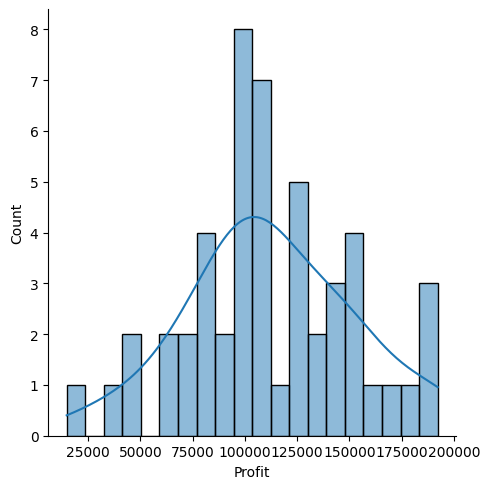

<Figure size 3000x3000 with 0 Axes>

In [12]:
#Visualisation for test dataset
sns.displot(dataset['Profit'],bins=20,kde=True)
plt.figure(figsize=(30,30))
plt.tight_layout()

In [13]:
X = df.iloc[:,:3].values
Y = df.iloc[:,3].values

x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=0)

reg = LinearRegression()

reg.fit(x_train,y_train)
pred = reg.predict(x_test)

df1 = pd.DataFrame({'Actual Value ':y_test,'Predictive Values':pred})
df1
score = reg.score(x_train,y_train)

array([103901.8969696 , 132763.05993126, 133567.90370044,  72911.78976736,
       179627.92567224, 115166.64864795,  67113.5769057 ,  98154.80686776,
       114756.11555221, 169064.01408795])

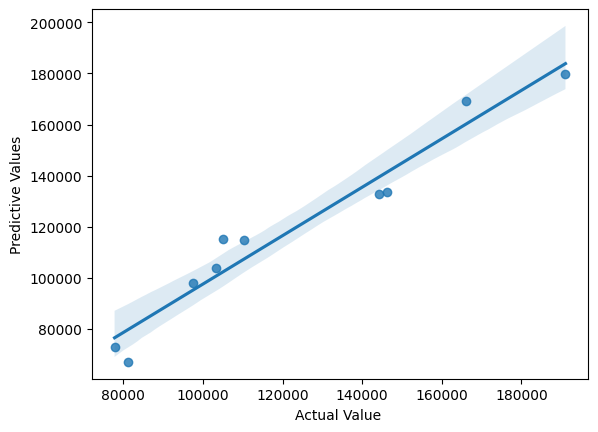

In [14]:
sns.regplot(data=df1,x='Actual Value ',y='Predictive Values')
pred

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics import confusion_matrix

mse=mean_squared_error(y_test,pred)
r2_error = r2_score(y_test,pred)
mae=mean_absolute_error(y_test,pred)
rmse = np.sqrt(mse)

score_df = pd.DataFrame({'r2':[r2_error],'Score':[score]})
score_df


r2     Score
0  0.939396  0.949957

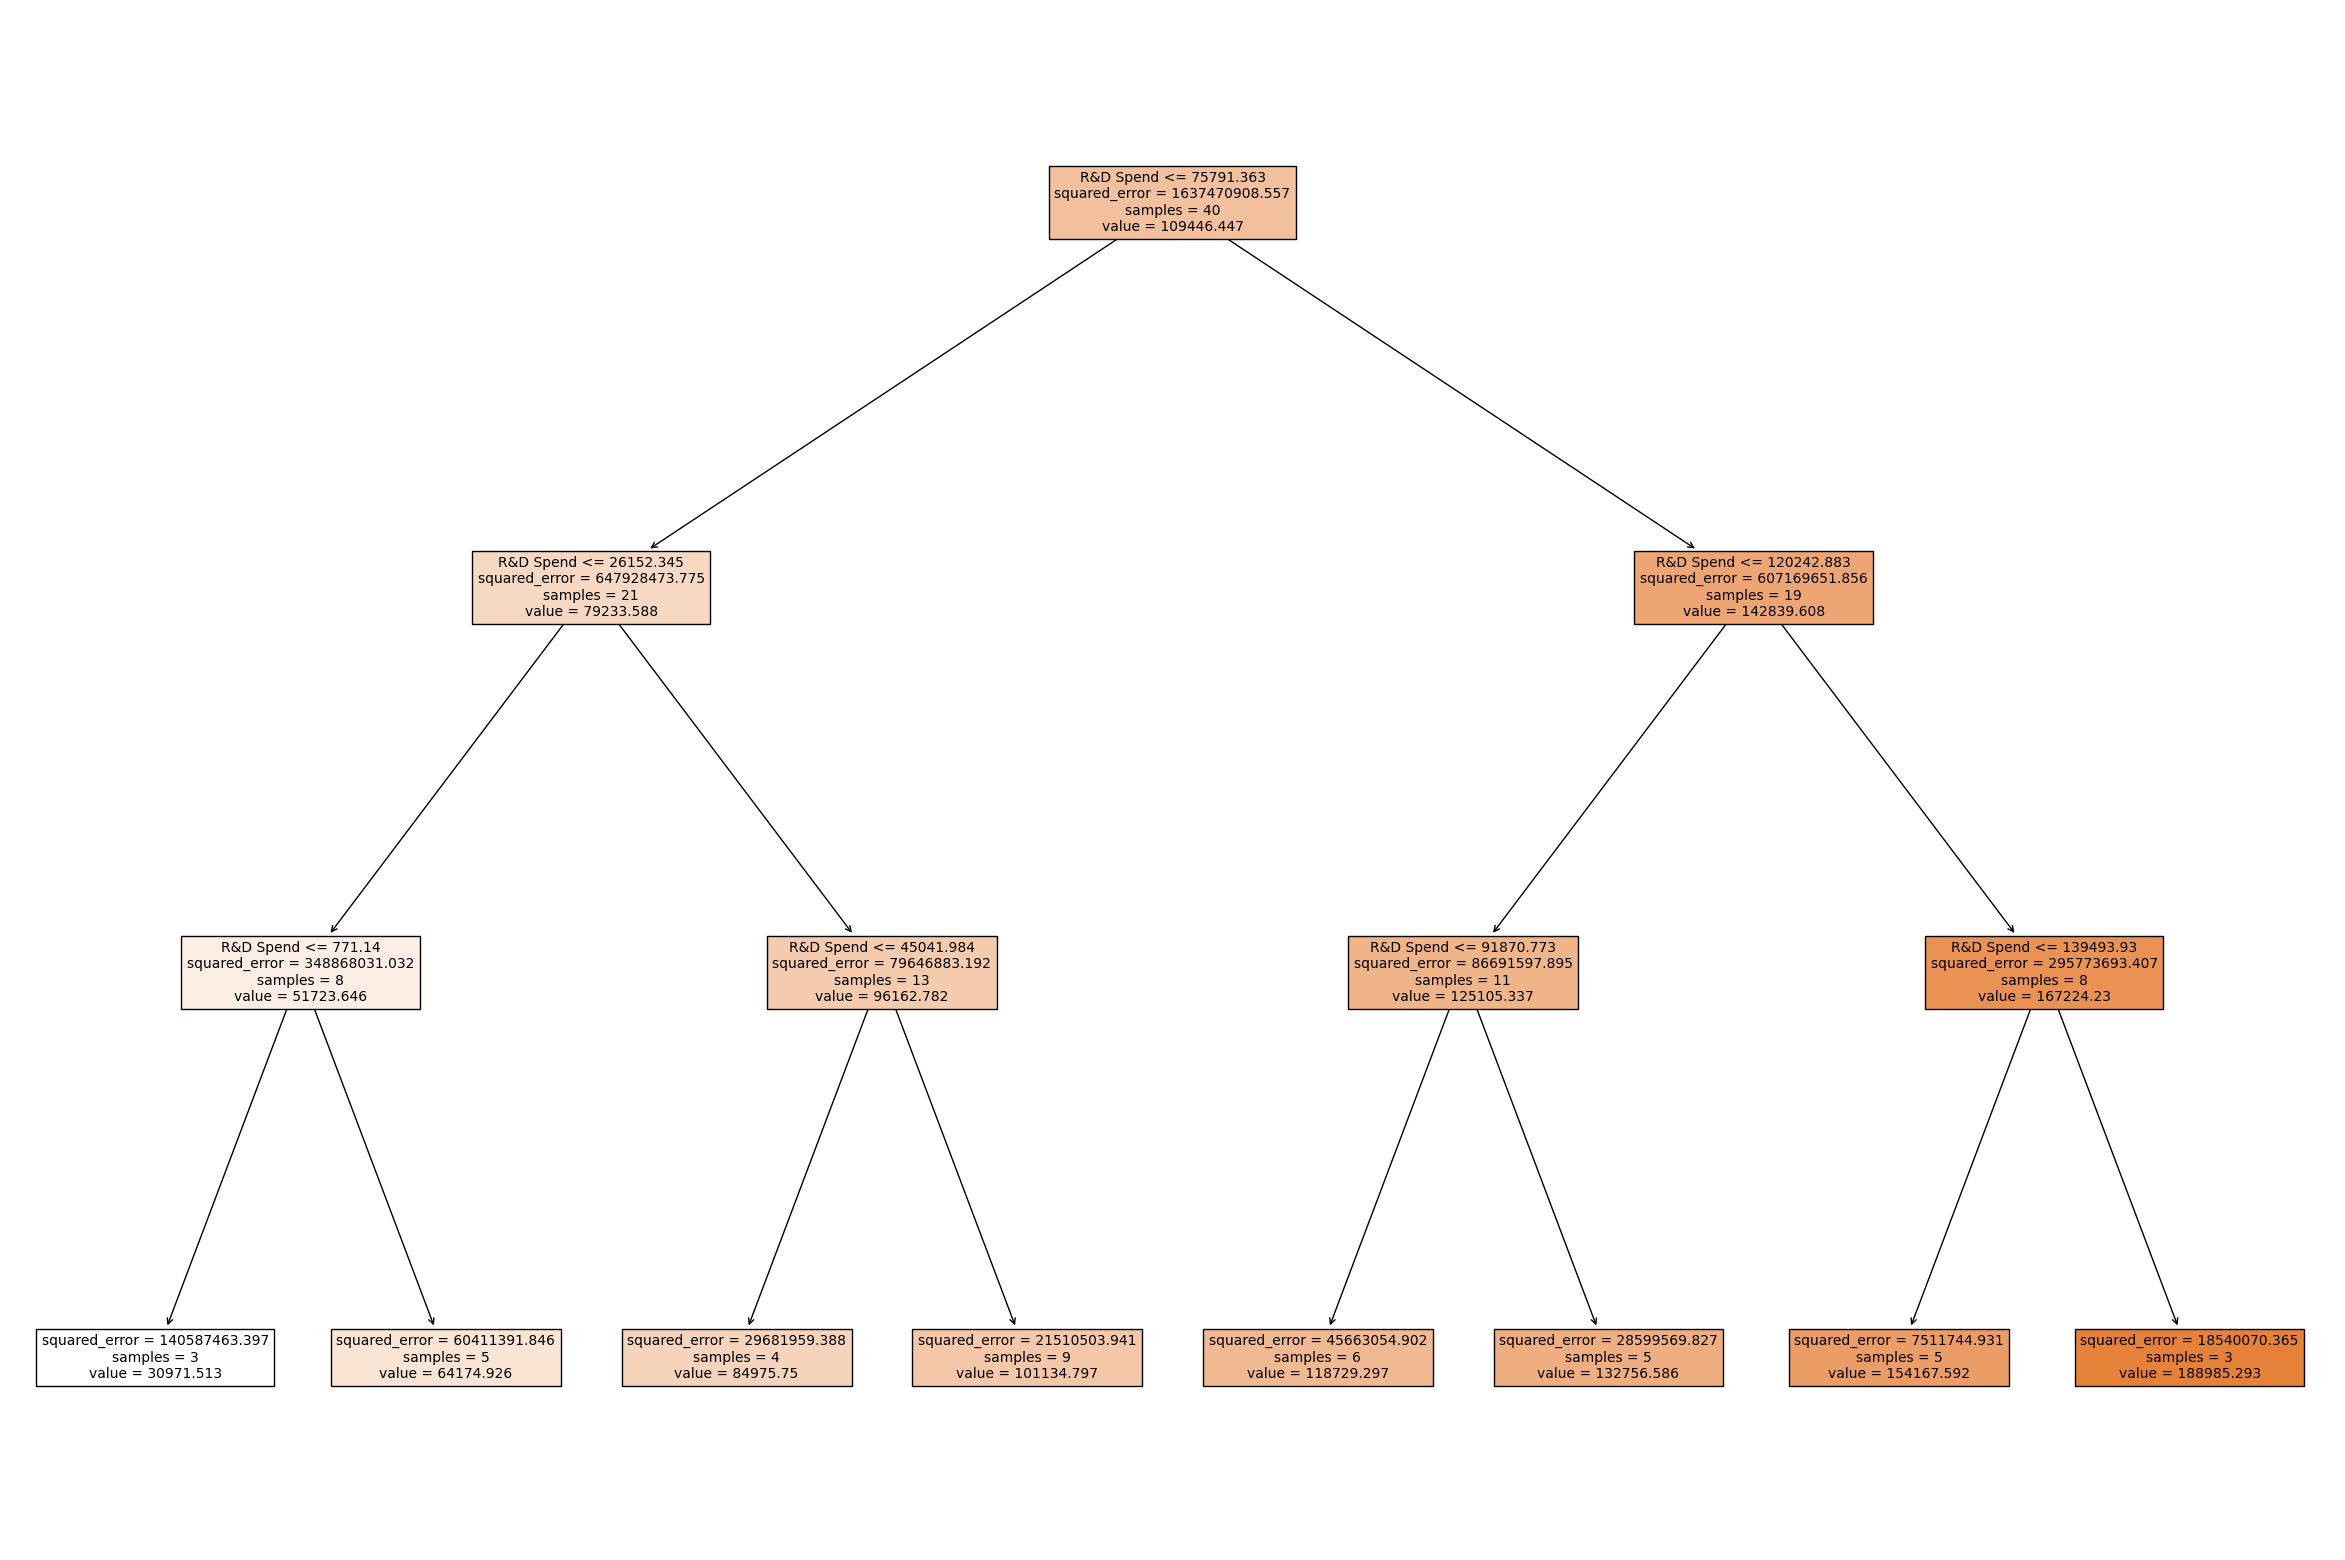

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree as t

dec_tree = DecisionTreeRegressor(max_depth = 3)

dec_tree.fit(x_train,y_train)
y_pred = dec_tree.predict(x_test)
plt.figure(figsize=(30,20))
t.plot_tree(dec_tree,filled=True,fontsize=10,feature_names=df.keys(),class_names=df.Profit.keys())
plt.show()
dec_score = dec_tree.score(x_train,y_train)

In [17]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2_error = r2_score(y_test,y_pred)

score_df.loc[len(score_df.index)] = [r2_error,dec_score]

score_df

r2     Score
0  0.939396  0.949957
1  0.898725  0.976392

/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


r2     Score
0  0.939396  0.949957
1  0.898725  0.976392
2  1.000000  0.891892

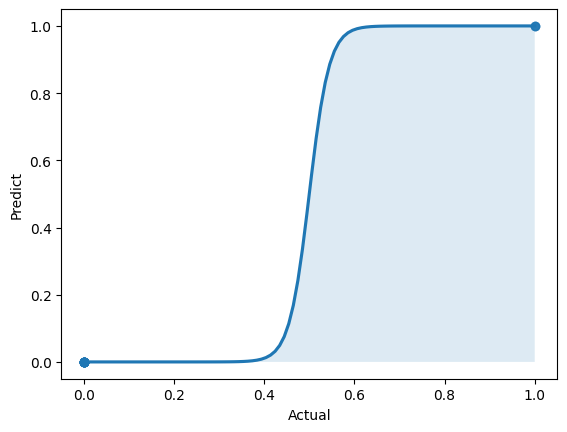

In [18]:
from sklearn.linear_model import LogisticRegression
df['Bin'] = (df['Profit']>df.Profit.mean()).astype(int)

x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,:3],df.Bin,random_state=1)
#sns.regplot(data=df,x='Profit',y='Bin', logistic=True)

log = LogisticRegression()
log.fit(x_train,y_train)

z_pred = log.predict(x_test)

df2 = pd.DataFrame({'Actual':y_test,'Predict':z_pred})

sns.regplot(data=df2,x='Actual',y='Predict', logistic=True)

log.score(x_train,y_train)

warnings.filterwarnings('ignore')
score = log.score(x_train,y_train)
score_df.loc[len(score_df.index)] = [r2_score(y_test,z_pred),score]
score_df


r2     Score
0  0.939396  0.949957
1  0.898725  0.976392
2  1.000000  0.891892
3  0.169004  0.821676

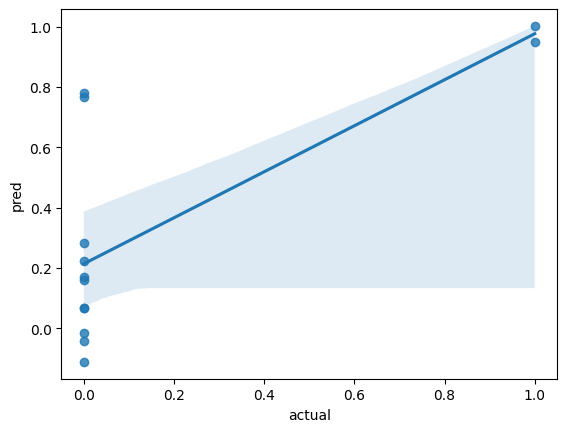

In [19]:
from sklearn.svm import SVR

vec = SVR(kernel='rbf')

#df = pd.DataFrame({'X':[1,2,3,4,5,6],'XX':[2,4,6,8,10,12],'Y':[3,6,9,12,15,18]})
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=1)

vec.fit(x_train,y_train)

m_pred = vec.predict(x_test)

df2 = pd.DataFrame({'actual':y_test,'pred':m_pred})

sns.regplot(data=df2,x='actual',y='pred')

r2_error=r2_score(y_test,m_pred)
mse = mean_squared_error(y_test,m_pred)
mae = mean_absolute_error(y_test,m_pred)
rmse = np.sqrt(mse)
score = vec.score(x_train,y_train)
score_df.loc[len(score_df.index)] = [r2_error,score]
#score_df.index = ['Linear','DecisionTree','Logistic','SVR']
score_df